In [1]:
#-*-coding:utf-8-*-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_excel('지수데이터.xlsx')
# 100을 기준으로 함
for i in['total_price_index','fresh_vegi_index', 'living_price_index', 'food_living_index']:
    df[i] = df[i] - 100
# 컬럼 이름 알아보기 쉽게 바꿔줌
df = df.rename(columns={'total_price_index': '소비자물가지수'})
df = df.rename(columns={'fresh_vegi_index': '신선야채지수'})
df = df.rename(columns={'living_price_index': '생활물가지수'})
df = df.rename(columns={'food_living_index': '식품생활지수'})
df

,date_time,소비자물가지수,신선야채지수,생활물가지수,식품생활지수
0,2013-01-01,-7.272,-4.054,-5.690,-13.173
1,2013-02-01,-6.962,-2.539,-5.250,-12.748
2,2013-03-01,-7.048,-5.489,-5.479,-13.456
3,2013-04-01,-7.177,-5.849,-5.673,-13.220
4,2013-05-01,-7.177,-10.058,-5.999,-13.881
...,...,...,...,...,...
119,2022-12-01,9.280,-0.590,10.690,13.630
120,2023-01-01,10.100,13.680,11.770,15.070
121,2023-02-01,10.380,17.620,12.190,15.710
122,2023-03-01,10.560,18.780,12.330,16.340


In [4]:
# 날짜 범위가 '2018-01-01'에서 '2023-05-17'인 새 데이터 프레임 생성
new_date_range = pd.date_range(start='2013-01-01', end='2023-04-01', name='date_time')
new_withnull_df = pd.DataFrame({'date_time': new_date_range})

# 새 데이터 프레임을 기존 데이터 프레임과 병합
index_df = pd.merge(new_withnull_df, df, on='date_time', how='left')

# date_time을 기준으로 데이터 프레임 정렬
index_df = index_df.sort_values('date_time').reset_index(drop=True)

In [5]:
df.shape

(124, 5)

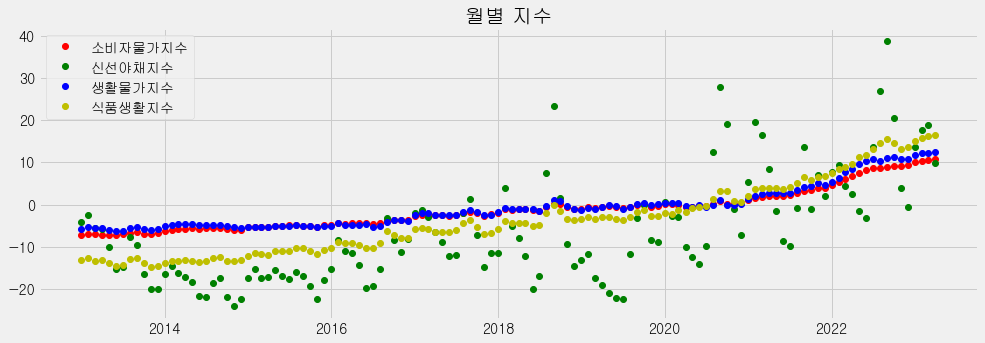

In [6]:
#### 원본데이터는 월별데이터라 일별데이터로 바꿔줘야 함

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15,5))

# plot 표시
ax.plot(df['date_time'], df['소비자물가지수'], 'ro')
ax.plot(df['date_time'], df['신선야채지수'], 'go')
ax.plot(df['date_time'], df['생활물가지수'], 'bo')
ax.plot(df['date_time'], df['식품생활지수'], 'yo')

# 플롯 제목 및 범례 설정
ax.set_title('월별 지수')
ax.legend(['소비자물가지수', '신선야채지수', '생활물가지수', '식품생활지수'])

# 플롯 표시
plt.show()

In [7]:
index_df.shape

(3743, 5)

In [8]:
index_df.isnull().sum()

date_time       0
소비자물가지수      3619
신선야채지수       3619
생활물가지수       3619
식품생활지수       3619
dtype: int64

In [9]:
new_index_df = index_df.interpolate()

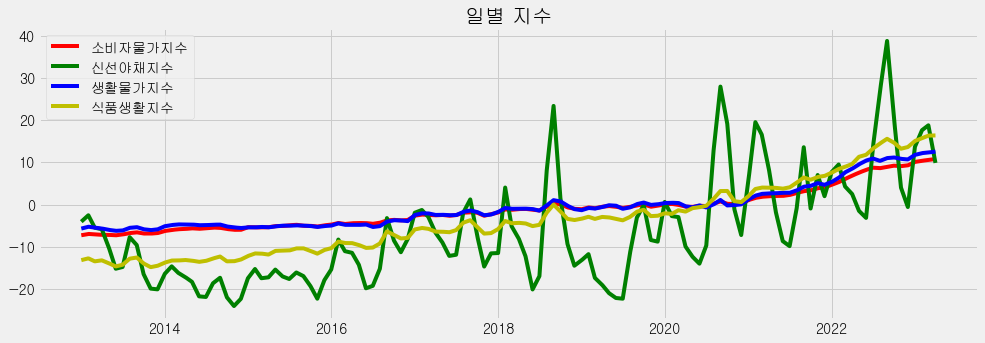

In [10]:
#### 일별데이터로 바꿔준 모습

# 원하는 너비 및 높이 설정
fig, ax = plt.subplots(figsize=(15,5))

# plot 표시
ax.plot(new_index_df['date_time'], new_index_df['소비자물가지수'], 'r')
ax.plot(new_index_df['date_time'], new_index_df['신선야채지수'], 'g')
ax.plot(new_index_df['date_time'], new_index_df['생활물가지수'], 'b')
ax.plot(new_index_df['date_time'], new_index_df['식품생활지수'], 'y')

# 플롯 제목 및 범례 설정
ax.set_title('일별 지수')
ax.legend(['소비자물가지수', '신선야채지수', '생활물가지수', '식품생활지수'])

# 플롯 표시
plt.show()

In [11]:
new_index_df = new_index_df.set_index('date_time')
new_index_df.head()

,소비자물가지수,신선야채지수,생활물가지수,식품생활지수
date_time,,,,
2013-01-01,-7.272,-4.054000,-5.690000,-13.173000
2013-01-02,-7.262,-4.005129,-5.675806,-13.159290
2013-01-03,-7.252,-3.956258,-5.661613,-13.145581
2013-01-04,-7.242,-3.907387,-5.647419,-13.131871
2013-01-05,-7.232,-3.858516,-5.633226,-13.118161


In [12]:
new_index_df.to_excel(excel_writer='index_data.xlsx', sheet_name='전처리완료지수데이터')